In [257]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ref - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [258]:
# import data
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Features
- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change

# EDA

In [259]:
df.shape

(19158, 14)

In [260]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [261]:
# drop unnecessary columns
df.drop(['enrollee_id', 'city'], axis = 1, inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Investigating Categorical Variables

### `gender`

In [262]:
# value_counts
df['gender'].value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

Since `number of females << number of males`, we will convert this into a binary feature - **`Male_Yes`** and **`Male_No`**` and binarize them to 1 and 0, respectively

In [263]:
df['gender'] = df['gender'].map(lambda x : 1 if x == 'Male' else 0)
df['gender'].value_counts(dropna = False)

1    13221
0     5937
Name: gender, dtype: int64

### `relevant_experience`

In [264]:
# value_counts
df['relevent_experience'].value_counts(dropna = False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [265]:
# minimiozing values for relevent_experience
df['relevent_experience'] = df['relevent_experience'].map(lambda x : 1 if x == 'Has relevent experience' else 0)
df['relevent_experience'].value_counts(dropna = False)

1    13792
0     5366
Name: relevent_experience, dtype: int64

### Academics - `enrolled_university`, `education_level`, `major_discipline`

In [266]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [267]:
# value_counts
df['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [268]:
df['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [269]:
df['major_discipline'].value_counts(dropna = False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

- Let's check distribution of values when one of the three variables is NULL

In [270]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when %s is null" % (i))
            print(df.loc[df[i].isna(), j].value_counts(dropna = False))
            print()
        else:
            continue

when enrolled_university is null
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

when enrolled_university is null
STEM               208
NaN                157
Humanities           9
Other                4
No Major             4
Business Degree      2
Arts                 2
Name: major_discipline, dtype: int64

when education_level is null
no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

when education_level is null
NaN    460
Name: major_discipline, dtype: int64

when major_discipline is null
no_enrollment       1481
Full time course     976
Part time course     199
NaN                  157
Name: enrolled_university, dtype: int64

when major_discipline is null
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: 

when `enrolled_university` is NULL, `education_level` -


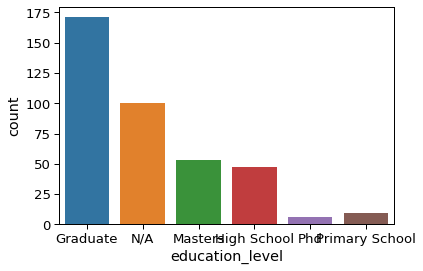


when `enrolled_university` is NULL, `major_discipline` -


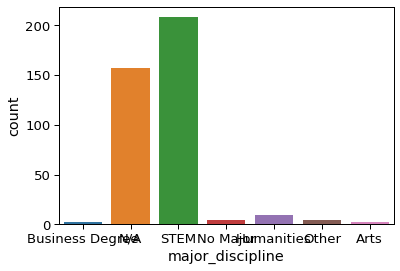


when `education_level` is NULL, `enrolled_university` -


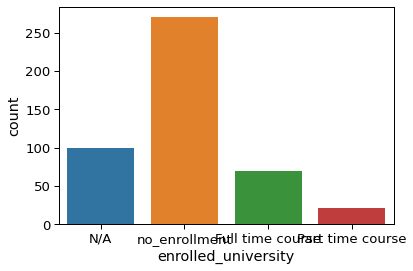


when `education_level` is NULL, `major_discipline` -


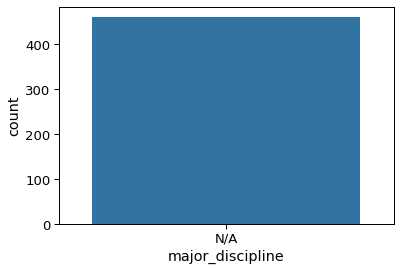


when `major_discipline` is NULL, `enrolled_university` -


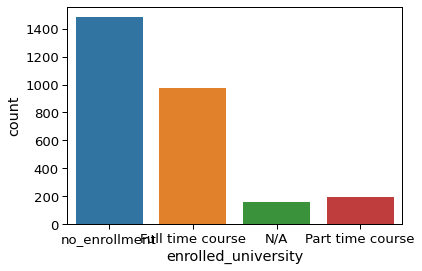


when `major_discipline` is NULL, `education_level` -


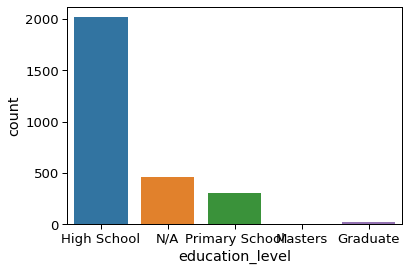

In [271]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when `%s` is NULL, `%s` -" % (i, j))
            sns.countplot(df.loc[df[i].isna(), j].fillna("N/A"))
            plt.show()
            print()
        else:
            continue

In [272]:
pd.crosstab(df['education_level'].fillna("N/A"), df['enrolled_university'].fillna("N/A"))

enrolled_university,Full time course,N/A,Part time course,no_enrollment
education_level,,,,
Graduate,2209,171,784,8434
High School,864,47,166,940
Masters,557,53,204,3547
N/A,69,100,21,270
Phd,25,6,12,371
Primary School,33,9,11,255


#### Observations - 
1. ***`enrolled_university`*** -  
- Majority of NULLS have **`education_level` == *graduation or higher*** , so we can assume that they did not enroll to any university course. Remaining values can be assumed as "not enrolled" too.  
- To further solidify our assumption, we will take a look at the crosstab above as well. We observe that `education_level` == NULL has maximum values against `enrolled_university` = "no enrollment". While, for `enrolled_university` == NULL has maximum values in `education_level` = "Graduate".

2. ***`education_level`*** - We plan to make this variable have 3 categories - "High School or Lower", "Graduation" and "Post Graduation". We can then club NULLS with "High School or Lower" category since their `major_discipline` is also NULL (heavy majority of the cases where `major_discipline` is NULL have `education_level` up to High School only). 

3. ***`major_discipline`*** - We plan to make this a binary variable - "STEM" and "Non-STEM". Now, heavy majority of the cases where Major Discipline is NULL have education up to High School only. So, we will simply put NULLS into "Non-STEM" category.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

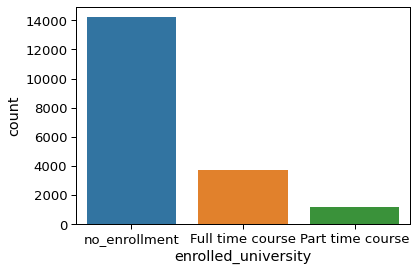

In [273]:
# enrolled_university
df['enrolled_university'] = df['enrolled_university'].fillna("no_enrollment")
sns.countplot(df['enrolled_university'])

- The variable `enrolled_university` is also extremely skewed which is why we will merge "Full Time" and "Part Time" into one category i.e. **enrolled**.
- We will also binarize the variable into 1 and 0 meaning "Enrolled" and "Not Enrolled" respectively.

<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

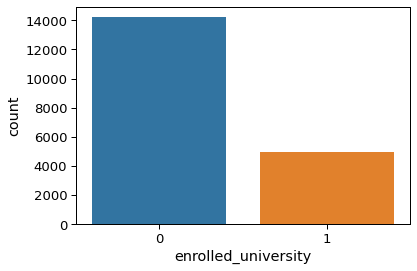

In [274]:
df['enrolled_university'] = df['enrolled_university'].map(lambda x : 0 if x == "no_enrollment" else 1)
sns.countplot(df['enrolled_university'])

In [275]:
# education_level
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [276]:
def education(x):
    if x in ['Masters', 'Phd']:
        return 2
        # "Post Graduate"
    elif x == "Graduate":
        return 1
        # "Graduate"
    else:
        return 0 
        # "Non-Graduate"

<AxesSubplot:xlabel='education_level', ylabel='count'>

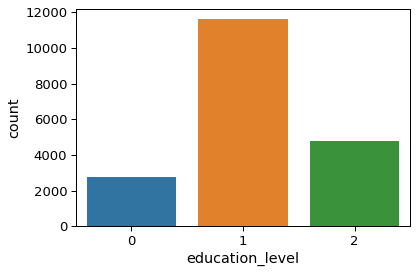

In [277]:
df['education_level'] = df['education_level'].map(education)
sns.countplot(df['education_level'])

<AxesSubplot:xlabel='major_discipline', ylabel='count'>

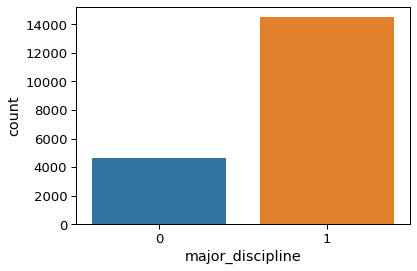

In [278]:
# major_discipline
df['major_discipline'] = df['major_discipline'].map(lambda x : 1 if x == "STEM" else 0)
sns.countplot(df['major_discipline'])

### `experience`

In [279]:
# value_counts
df['experience'].value_counts(dropna = False)

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
NaN      65
Name: experience, dtype: int64

#### Observations - 
1. NULLS - There are only 65 NULLS, we can equate them to 0 because this is the information which companies usually have or we can simply remove the rows. We will do the former.
2. We can probably use this as a categorical variable by using ranges of experience, which is also commonly seen in job requirements. We can use the below groups - 
        - 0 to 2
        - 3 to 6
        - 7 to 10
        - 10 to 20
        - 20 and above

In [280]:
def experience_groups(x):
    if (x in [np.nan, '1', '2']):
        return 0 
        # "0 to 2"
    elif x in ['3', '4', '5', '6']:
        return 1
        # "3 to 6"
    elif x in ['7', '8', '9', '10']:
        return 2
        # "7 to 10"
    elif x == ">20":
        return 3
        # "20+"
    else:
        return 4
        # "10 to 20"

In [281]:
df['experience'] = df['experience'].map(experience_groups)
df['experience'].value_counts(dropna = False)

1    5403
4    4933
2    3795
3    3286
0    1741
Name: experience, dtype: int64

###  `last_new_job`

In [282]:
# value_counts
df['last_new_job'].value_counts(dropna = False)

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
NaN       423
Name: last_new_job, dtype: int64

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

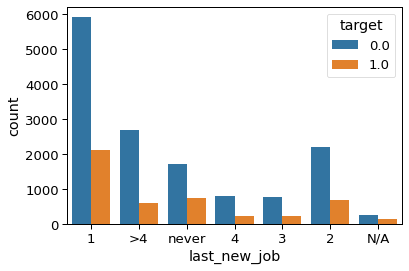

In [283]:
sns.countplot(df['last_new_job'].fillna("N/A"), hue = df['target'])

- There are 423 NULLs in this variable and these can be equated to "never" since this is the information the company usually has.
- Based on the frequency distribution above, we can create the below groups - 
        - "1"
        - "2 or more"
        - "never"

In [284]:
def last_job_groups(x):
    if x in [np.nan, 'never']:
        return 0 
        # "never"
    elif x == "1":
        return 1
    else:
        return 2 
        # "2 or more"

In [285]:
df['last_new_job'] = df['last_new_job'].map(last_job_groups)
df['last_new_job'].value_counts(dropna = False)

2    8243
1    8040
0    2875
Name: last_new_job, dtype: int64

In [286]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,1,0,1,1,3,NaN,NaN,1,36,1.0
1,0.776,1,0,0,1,1,4,50-99,Pvt Ltd,2,47,0.0
2,0.624,0,0,1,1,1,1,NaN,NaN,0,83,0.0
3,0.789,0,0,0,1,0,4,NaN,Pvt Ltd,0,52,1.0
4,0.767,1,1,0,2,1,3,50-99,Funded Startup,2,8,0.0


### `company_size` and `company_type`

In [287]:
# value_counts
df['company_size'].value_counts(dropna = False, normalize = True)

NaN          0.309949
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64

In [288]:
# value_counts
df['company_type'].value_counts(dropna = False, normalize = True)

Pvt Ltd                0.512423
NaN                    0.320493
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64

- Over 30% of data is missing for both the variables, so we will drop these features.

In [289]:
df.drop(['company_size', 'company_type'], axis = 1, inplace=True)

In [290]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,training_hours,target
0,0.920,1,1,0,1,1,3,1,36,1.0
1,0.776,1,0,0,1,1,4,2,47,0.0
2,0.624,0,0,1,1,1,1,0,83,0.0
3,0.789,0,0,0,1,0,4,0,52,1.0
4,0.767,1,1,0,2,1,3,2,8,0.0


## Investigating Numerical Variables

In [291]:
# function to get normality plots
def prob_plots(x):
    from scipy.stats import probplot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))

    res = probplot(x, plot = ax[0])
    ax[0].set_title("Q-Q Plot")

    ax[1] = sns.kdeplot(x, fill = True, ax = ax[1])
    ax[1].set_title("KDE (PDF) Plot")

    ax[2] = sns.ecdfplot(x, ax = ax[2])
    ax[2].set_title("KDE (PDF) Plot")

### `city_development_index`

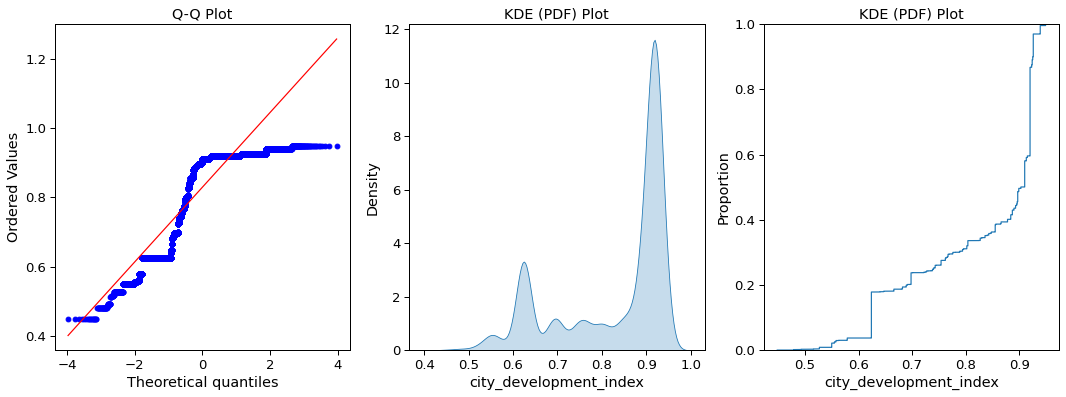

In [292]:
prob_plots(df['city_development_index'])

<AxesSubplot:xlabel='target', ylabel='city_development_index'>

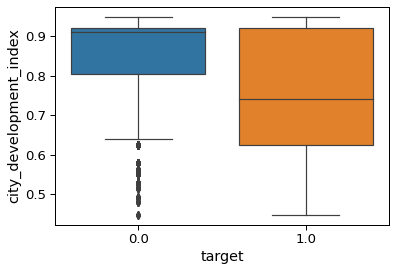

In [293]:
sns.boxplot(y = df['city_development_index'], x = df['target'])

- It seems that a higher median `city_development_index` relates to employees being more probable to stay in their current jobs.
- We will keep the variable as is for now.

<AxesSubplot:ylabel='city_development_index'>

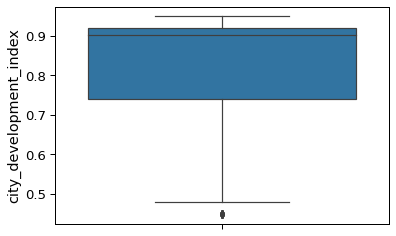

In [294]:
# check for outliers
sns.boxplot(y = df['city_development_index'])

### `training_hours`

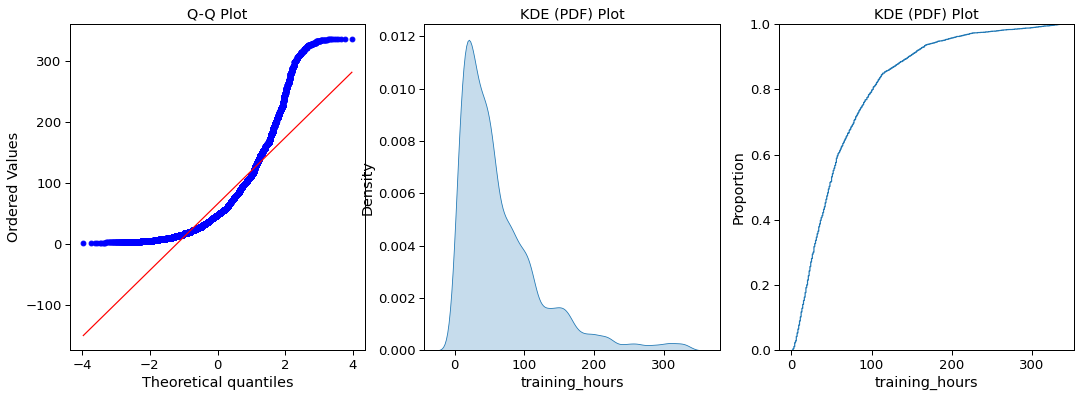

In [295]:
prob_plots(df['training_hours'])

<AxesSubplot:xlabel='target', ylabel='training_hours'>

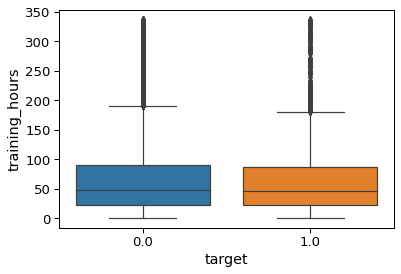

In [296]:
sns.boxplot(y = df['training_hours'], x = df['target'])

- It seems the feature has too many outliers, or rather extreme values, in it. Hence, we will try applying a log transformation to see if that effect is reduced. 

<AxesSubplot:xlabel='target', ylabel='training_hours'>

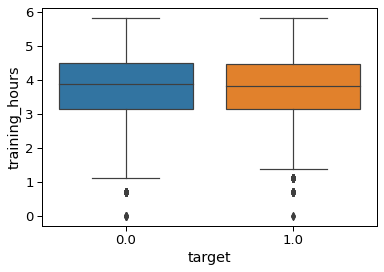

In [297]:
# check for outliers
sns.boxplot(y = np.log(df['training_hours']), x = df['target'])

- This looks much better. We will move ahead with the transformation.

In [298]:
df['log_training_hours'] = np.log(df['training_hours'])
df.drop('training_hours', axis = 1, inplace = True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,last_new_job,target,log_training_hours
0,0.920,1,1,0,1,1,3,1,1.0,3.583519
1,0.776,1,0,0,1,1,4,2,0.0,3.850148
2,0.624,0,0,1,1,1,1,0,0.0,4.418841
3,0.789,0,0,0,1,0,4,0,1.0,3.951244
4,0.767,1,1,0,2,1,3,2,0.0,2.079442


## Check for multicollinearity between two numeric variables.

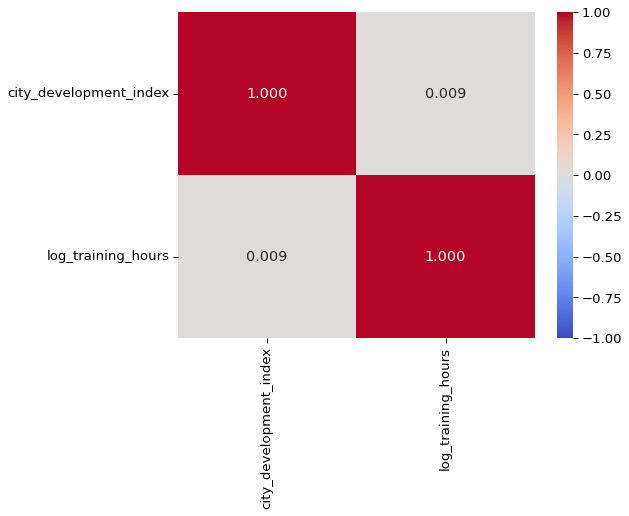

In [300]:
# correlation plot
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

corr = df[["city_development_index", "log_training_hours"]].corr()

hm = sns.heatmap(corr, cmap="coolwarm", annot=True, vmin = -1, vmax = 1, fmt='.3f')
hm.set_xticklabels(labels=corr.columns.values, rotation=90)
hm.set_yticklabels(labels=corr.columns.values, rotation=0);

# Model Training

### Data Preparation for sklearn

In [301]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train =', X_train.shape)
print('X_test =', X_test.shape)
print('y_train =', y_train.shape)
print('y_test =', y_test.shape)

X_train = (13410, 9)
X_test = (5748, 9)
y_train = (13410,)
y_test = (5748,)


## 1. Decision Trees

In [302]:
# build tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)

In [303]:
# check score on training set
clf.score(X_train, y_train)

0.9803877703206563

In [304]:
# check score on testing set
clf.score(X_test, y_test)

0.6833681280445373

We can see that the model has overfit. We will now try to regularize this Decision Tree to eliminate overfitting.

In [306]:
from sklearn.model_selection import RandomizedSearchCV

cv_parameters = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20, 30, 40],
              "max_depth": [2, 5, 10, 15, 25],
              "min_samples_leaf": [1, 5, 10, 15, 20],
              "max_leaf_nodes": [5, 10, 20, 30, 40],
              }

dt_classifier = RandomizedSearchCV(estimator=tree.DecisionTreeClassifier(random_state = 42), 
                                   param_distributions=cv_parameters,
                                   cv = 5,
                                   scoring = 'accuracy',
                                   return_train_score = 'True',
                                   n_iter=100,
                                   random_state=42
                                  )
dt_classifier.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10, 15, 25],
                                        'max_leaf_nodes': [5, 10, 20, 30, 40],
                                        'min_samples_leaf': [1, 5, 10, 15, 20],
                                        'min_samples_split': [2, 10, 20, 30,
                                                              40]},
                   random_state=42, return_train_score='True',
                   scoring='accuracy')

In [307]:
dt_classifier.best_score_

0.7868754660700968

In [308]:
cv_results = pd.DataFrame(dt_classifier.cv_results_).dropna()
cv_results = cv_results.iloc[:, [4,5,6,7,8,15,23,16,24]]
cv_results.sort_values(by = 'mean_test_score', ascending = False).head()

,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_depth,param_criterion,mean_test_score,mean_train_score,std_test_score,std_train_score
50,2,10,5,5,entropy,0.786875,0.786875,0.005427,0.001357
33,2,20,10,5,gini,0.786875,0.786875,0.005427,0.001357
23,30,1,10,5,entropy,0.786875,0.786875,0.005427,0.001357
24,2,20,5,10,gini,0.786875,0.786875,0.005427,0.001357
68,30,5,10,25,entropy,0.786875,0.786875,0.005427,0.001357


- Earlier, we had a training score of 0.98 and testing score of 0.68. The model has obviously overfit and after applying Regularization with Cross Validation, we see that the training score and the testing score are both now a modest 0.78. 

Let's take a look at how the best tree is built.

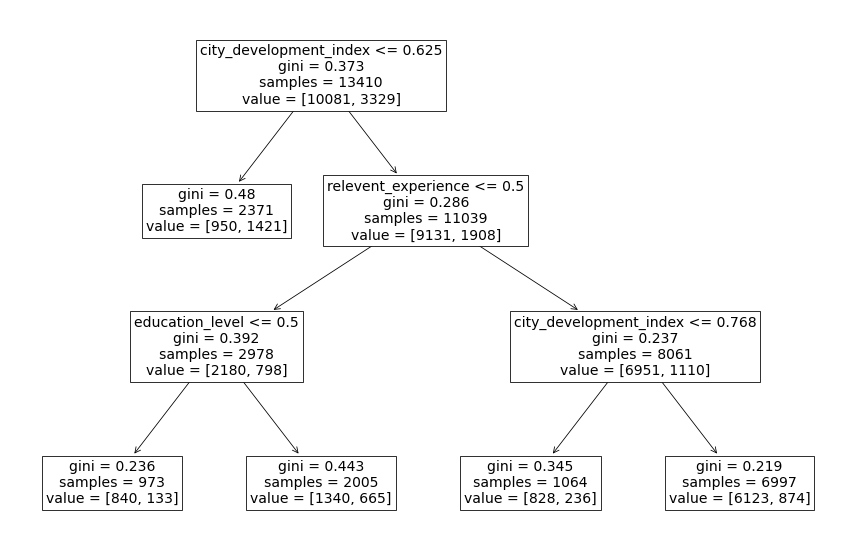

In [309]:
# visualizing tree
_, ax = plt.subplots(figsize=(15,10)) # Resize figure
tree.plot_tree(dt_classifier.best_estimator_, feature_names=X_train.columns, fontsize=14)
plt.show()

- We will now try to see if this can be improved upon by using [Cost Complexity Pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) using original Decision Tree which had overfit - 

Basic Concept - 
- The `cost_complexity_pruning_path()` function of the `DecisionTreeClassifier()` provides a list of Alpha values, `ccp_alpha`, for each pruned tree at the weakest link (one that least minimizes or does not minimize the misclassificaiton rate from parent to leaf node).
- When &#945; $= 0$, the tree is unpruned and as &#945; &#8594; &#8734;, the tree size $T$ &#8594; $1$. 
- We then plot the traning v/s testing set accuracies for each `ccp_alpha` and see how the accuracy changes with each value. We can then use cross validation around a set of values where training and testing accuracy are good as well as close enough to check which one gives us the best performance.

In [310]:
clf = tree.DecisionTreeClassifier(random_state = 42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

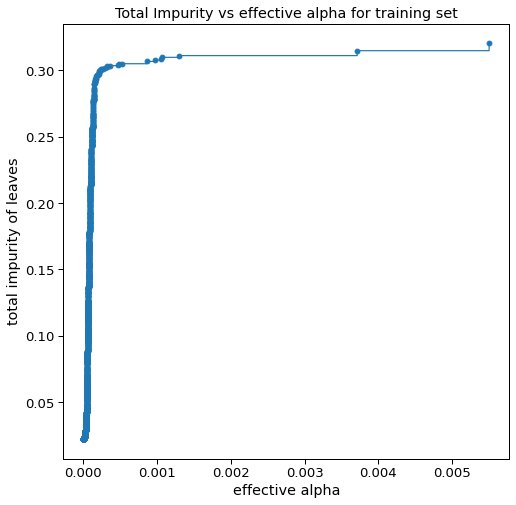

In [311]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [320]:
clfs = []
ccp_alphas = ccp_alphas[ccp_alphas>=0]
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05294659854356043


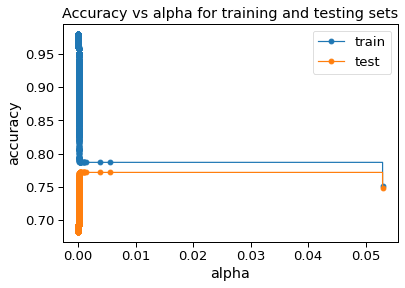

In [321]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


- Using Cost Complexity pruninig as well, we see that the accuracy is not improved significantly. We will move ahead with Ensemble Learning now.

## 2. Random Forests - Bagging

We will first fit a default Random Forest and then use CV (Randomized Search).

In [322]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42, oob_score = True)

clf_rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [323]:
clf_rf.score(X_train, y_train)

0.9803877703206563

In [324]:
clf_rf.score(X_test, y_test)

0.7336464857341684

- As we can see, the model seems to be overfitting. This is because we have not applied any hyperparameter tuninig. 
- We will now try hyperparameter tuninig and see if we get any improvement. 
- First, let's check how OOB error drops with increase in trees.

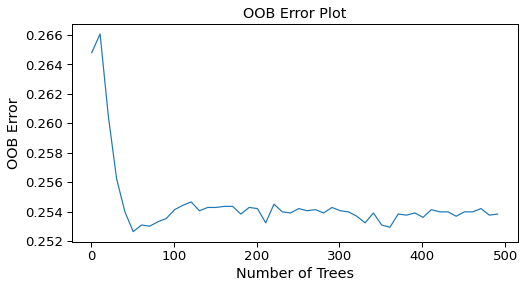

In [325]:
# check oob error
n_estimators = 500

oob_errors = []

for i in range(1, n_estimators + 1, 10):
    clf_rf.set_params(n_estimators=i)
    clf_rf.fit(X_train, y_train)
    oob_errors.append([i, 1 - clf_rf.oob_score_])

xs, ys = zip(*oob_errors)  # * to unpack by 1 dim

plt.figure(figsize=(8,4))
sns.lineplot(x = xs, y = ys)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("OOB Error Plot")
plt.show()

- Even for 500 trees, we are not getting any significant improvement. 
- Let's try some other stuff.

In [326]:
from sklearn.model_selection import GridSearchCV

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'n_estimators': [200, 400, 600]
         }

clf_rf_cv = GridSearchCV(estimator = RandomForestClassifier(random_state = 42),
                         param_grid = params,
                         cv = 3,
                         return_train_score = True,
                         scoring = 'accuracy'
                        )

clf_rf_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600]},
             return_train_score=True, scoring='accuracy')

In [327]:
clf_rf_cv.best_score_

0.7449664429530202

In [328]:
clf_rf_cv.score(X_train, y_train)

0.9803877703206563

In [329]:
clf_rf_cv.score(X_test, y_test)

0.7360821155184412

- It seems that tuninig hyperparameters has not solved the issue of overfitting using Random Forests either. Let's check the feature importance chart nonetheless.

In [330]:
clf_rf_cv.best_estimator_.feature_importances_

array([0.30172669, 0.02641152, 0.02290648, 0.02071453, 0.0339138 ,
       0.0188256 , 0.0696447 , 0.04391115, 0.46194553])

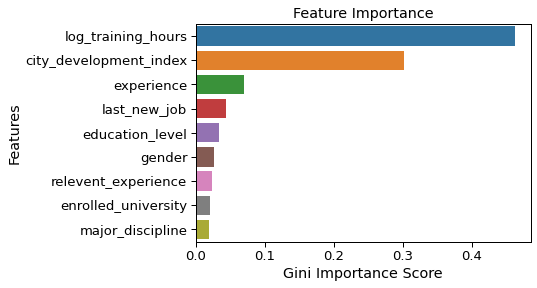

In [331]:
feature_scores = pd.Series(clf_rf_cv.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Gini Importance Score')
plt.ylabel('Features')
plt.title("Feature Importance")
plt.show()

- Let's try and build a Random Forest usiong the two important features.

In [332]:
feature_scores.index[:2]

Index(['log_training_hours', 'city_development_index'], dtype='object')

In [333]:
clf_rf = RandomForestClassifier(random_state=42, oob_score = True)
clf_rf.fit(X_train[feature_scores.index[:2]], y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [334]:
clf_rf.score(X_train[feature_scores.index[:2]], y_train)

0.839821029082774

In [335]:
clf_rf.score(X_test[feature_scores.index[:2]], y_test)

0.7413013221990258

- A little improvement but still negligible. Let's try some boosting methods now.

## 3. AdaBoost

In [336]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaBoost = AdaBoostClassifier(random_state=42,
                                  base_estimator = tree.DecisionTreeClassifier(),
                                  n_estimators=500
                                 )

clf_adaBoost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                   random_state=42)

In [337]:
clf_adaBoost.score(X_train, y_train)

0.9803877703206563

In [338]:
clf_adaBoost.score(X_test, y_test)

0.7159011830201809

In [339]:
from sklearn.metrics import classification_report

predictions = clf_adaBoost.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82      4300
         1.0       0.42      0.33      0.37      1448

    accuracy                           0.72      5748
   macro avg       0.60      0.59      0.59      5748
weighted avg       0.70      0.72      0.70      5748

